**Analisis Prediksi Jenis Produk Berdasarkan Review yang Diberikan**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
!unzip "/content/drive/MyDrive/Dicoding/Sub1-Kaggle-Women'sClothingReview/Kaggle-Women'sClothingReviews.zip" -d "/content/drive/MyDrive/Dicoding/Sub1-Kaggle-Women'sClothingReview"

Archive:  /content/drive/MyDrive/Dicoding/Sub1-Kaggle-Women'sClothingReview/Kaggle-Women'sClothingReviews.zip
replace /content/drive/MyDrive/Dicoding/Sub1-Kaggle-Women'sClothingReview/Kaggle-Women'sClothingReviews/Womens Clothing E-Commerce Reviews.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: /content/drive/MyDrive/Dicoding/Sub1-Kaggle-Women'sClothingReview/Kaggle-Women'sClothingReviews/Womens Clothing E-Commerce Reviews.csv  


In [ ]:
import pandas as pd
dataset = pd.read_csv("/content/drive/MyDrive/Dicoding/Sub1-Kaggle-Women'sClothingReview/Womens Clothing E-Commerce Reviews.csv")

# menghapus data yang mengandung nilai null
dataset.dropna(axis=0, subset=['Review Text','Department Name'], inplace=True)
# menghapus kolom yang tidak relevan
dataset = dataset.drop(columns=['Unnamed: 0','Title','Clothing ID','Age','Recommended IND','Division Name','Positive Feedback Count'])

dataset.head()

,Review Text,Rating,Department Name,Class Name
0,Absolutely wonderful - silky and sexy and comf...,4,Intimate,Intimates
1,Love this dress! it's sooo pretty. i happene...,5,Dresses,Dresses
2,I had such high hopes for this dress and reall...,3,Dresses,Dresses
3,"I love, love, love this jumpsuit. it's fun, fl...",5,Bottoms,Pants
4,This shirt is very flattering to all due to th...,5,Tops,Blouses


In [ ]:
dataset[90:100]

,Review Text,Rating,Department Name,Class Name
90,"I love cute summer dresses and this one, espec...",4,Dresses,Dresses
91,This top is so much prettier in real life than...,5,Tops,Blouses
94,This shirt caught my eye because of how beauti...,4,Tops,Blouses
95,"Purchased this top online, and when i received...",5,Tops,Knits
96,I usually wear a medium and bought a small. it...,1,Tops,Blouses
97,I was very excited to order this top in red xs...,1,Tops,Knits
99,I am in need of easy comfortable tops for ever...,3,Tops,Knits
100,At first i wasn't sure about it. the neckline ...,4,Tops,Knits
101,I find that this brand can be a little bit all...,4,Tops,Knits
102,This top is absolutely stunning. i purchased t...,5,Tops,Blouses


In [ ]:
import re
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')


dataset = dataset.reset_index(drop=True)
REPLACE_BY_SPACE_RE = re.compile('[/(){}\[\]\|@,;]')
BAD_SYMBOLS_RE = re.compile('[^0-9a-z #+_]')
STOPWORDS = set(stopwords.words('english'))

def clean_text(text):
    """
        text : a string

        return : modified initial string
    """
    text = str(text).lower()
    text = REPLACE_BY_SPACE_RE.sub(' ', text)
    text = BAD_SYMBOLS_RE.sub('', text)
    text = text.replace('x', '')
    text = ' '.join(word for word in text.split() if word not in STOPWORDS)
    return text
dataset['Review Text'] = dataset['Review Text'].apply(clean_text)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
dataset['Review Text'] = dataset['Review Text'].str.replace('\d+', '')

In [ ]:
contractions = {
"ain't": "am not",
"aren't": "are not",
"can't": "cannot",
"can't've": "cannot have",
"'cause": "because",
"could've": "could have",
"couldn't": "could not",
"couldn't've": "could not have",
"didn't": "did not",
"doesn't": "does not",
"don't": "do not",
"hadn't": "had not",
"hadn't've": "had not have",
"hasn't": "has not",
"haven't": "have not",
"he'd": "he would",
"he'd've": "he would have",
"he'll": "he will",
"he'll've": "he will have",
"he's": "he is",
"how'd": "how did",
"how'd'y": "how do you",
"how'll": "how will",
"how's": "how does",
"i'd": "i would",
"i'd've": "i would have",
"i'll": "i will",
"i'll've": "i will have",
"i'm": "i am",
"i've": "i have",
"isn't": "is not",
"it'd": "it would",
"it'd've": "it would have",
"it'll": "it will",
"it'll've": "it will have",
"it's": "it is",
"let's": "let us",
"ma'am": "madam",
"mayn't": "may not",
"might've": "might have",
"mightn't": "might not",
"mightn't've": "might not have",
"must've": "must have",
"mustn't": "must not",
"mustn't've": "must not have",
"needn't": "need not",
"needn't've": "need not have",
"o'clock": "of the clock",
"oughtn't": "ought not",
"oughtn't've": "ought not have",
"shan't": "shall not",
"sha'n't": "shall not",
"shan't've": "shall not have",
"she'd": "she would",
"she'd've": "she would have",
"she'll": "she will",
"she'll've": "she will have",
"she's": "she is",
"should've": "should have",
"shouldn't": "should not",
"shouldn't've": "should not have",
"so've": "so have",
"so's": "so is",
"that'd": "that would",
"that'd've": "that would have",
"that's": "that is",
"there'd": "there would",
"there'd've": "there would have",
"there's": "there is",
"they'd": "they would",
"they'd've": "they would have",
"they'll": "they will",
"they'll've": "they will have",
"they're": "they are",
"they've": "they have",
"to've": "to have",
"wasn't": "was not",
" u ": " you ",
" ur ": " your ",
" n ": " and "}

In [ ]:
dataset['Department Name'].value_counts()

Tops        10048
Dresses      6145
Bottoms      3662
Intimate     1653
Jackets      1002
Trend         118
Name: Department Name, dtype: int64

In [ ]:
dataset = dataset.loc[dataset['Department Name'].isin(["Tops","Bottoms"])]
grouped_review = dataset.groupby(["Class Name"])['Review Text'].apply(' ::: '.join).reset_index()


# Mendapatkan kata kunci
topWear = [ "top","blouse","shirt","upper","dress","torso","tank","sleeve","body","sweater"]
bottomWear = ["pant","jean","slack","skirt","leg","waist","lower","thigh","trouser","flare"]

In [ ]:
wordnet_lemmatizer = WordNetLemmatizer()
keyWords = topWear + bottomWear
dataFiltered = []
for each_review in dataset :
    temp = []
    for word in each_review :
        if not word in STOPWORDS and word in keyWords:
            temp.append(wordnet_lemmatizer.lemmatize(word))
    dataFiltered.append(temp)

In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

max_words = 10000
max_length = 250
embedding_dim = 100
tokenizer = Tokenizer(num_words=max_words, filters = '!"@#$%^&*(|[\]);<=>_{?}', lower=True, char_level=False)
tokenizer.fit_on_texts(dataset['Review Text'].values)
word_index = tokenizer.word_index
print('Found %s unique tokens' % len(word_index))

X = tokenizer.texts_to_sequences(dataset['Review Text'].values)
X = pad_sequences(X, maxlen=max_length)
print('Shape of data tensor', X.shape)

Found 13444 unique tokens
Shape of data tensor (13710, 250)


In [ ]:
Y = pd.get_dummies(dataset['Department Name']).values
print('Shape of Label Tensor :', Y.shape)

Shape of Label Tensor : (13710, 2)


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.20, random_state = 42)
print(X_train.shape, Y_train.shape)
print(X_test.shape, Y_test.shape)

(10968, 250) (10968, 2)
(2742, 250) (2742, 2)


In [ ]:
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Embedding, Bidirectional, SpatialDropout1D, LSTM, Dense

model = Sequential()
model.add(Embedding(max_words, embedding_dim, input_length=X.shape[1]))
model.add(Bidirectional(LSTM(150, return_sequences=True)))
model.add(SpatialDropout1D(0.2))
model.add(LSTM(100, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(64, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.01)))
model.add(Dense(2, activation='softmax'))
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 250, 100)          1000000   
_________________________________________________________________
bidirectional_1 (Bidirection (None, 250, 300)          301200    
_________________________________________________________________
spatial_dropout1d_1 (Spatial (None, 250, 300)          0         
_________________________________________________________________
lstm_3 (LSTM)                (None, 100)               160400    
_________________________________________________________________
dense_2 (Dense)              (None, 64)                6464      
_________________________________________________________________
dense_3 (Dense)              (None, 2)                 130       
Total params: 1,468,194
Trainable params: 1,468,194
Non-trainable params: 0
____________________________________________

In [ ]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy') > 0.97 and
    logs.get('val_accuracy') > 0.97 ):
      print("\Akurasi sudah mencapai 97%")
      self.model.stop_training = True
callbacks = myCallback()

In [ ]:
epochs = 20
batch_size = 256

history = model.fit(X_train, Y_train, epochs=epochs, batch_size=batch_size, validation_split=0.2, verbose=2, callbacks=[callbacks])

Epoch 1/20
35/35 - 268s - loss: 1.1611 - accuracy: 0.7340 - val_loss: 0.8375 - val_accuracy: 0.7958
Epoch 2/20
35/35 - 255s - loss: 0.7730 - accuracy: 0.8817 - val_loss: 0.5687 - val_accuracy: 0.9034
Epoch 3/20
35/35 - 254s - loss: 0.3912 - accuracy: 0.9496 - val_loss: 0.3684 - val_accuracy: 0.9211
Epoch 4/20
35/35 - 264s - loss: 0.2471 - accuracy: 0.9704 - val_loss: 0.4163 - val_accuracy: 0.8861
Epoch 5/20
35/35 - 264s - loss: 0.2058 - accuracy: 0.9642 - val_loss: 0.3171 - val_accuracy: 0.9198
Epoch 6/20
35/35 - 260s - loss: 0.1386 - accuracy: 0.9789 - val_loss: 0.3649 - val_accuracy: 0.9139
Epoch 7/20
35/35 - 264s - loss: 0.1086 - accuracy: 0.9824 - val_loss: 0.2886 - val_accuracy: 0.9271
Epoch 8/20
35/35 - 268s - loss: 0.0799 - accuracy: 0.9880 - val_loss: 0.2820 - val_accuracy: 0.9266
Epoch 9/20
35/35 - 268s - loss: 0.0626 - accuracy: 0.9911 - val_loss: 0.2793 - val_accuracy: 0.9253
Epoch 10/20
35/35 - 264s - loss: 0.0547 - accuracy: 0.9919 - val_loss: 0.2740 - val_accuracy: 0.9157

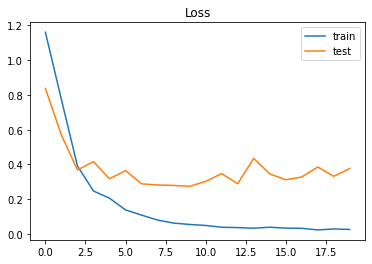

In [ ]:
import matplotlib.pyplot as plt

plt.title('Loss')
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show();

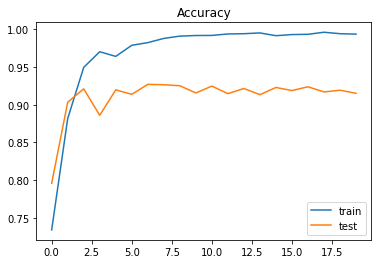

In [ ]:
plt.title('Accuracy')
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='test')
plt.legend()
plt.show();